In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/Users/robin/code/PyAURN')

In [17]:
import importAURN

SOUT = importAURN.importAURN('SOUT', range(2018, 2020))
print(SOUT.columns)
AURN = SOUT['2019-05-01':'2019-10-01']['NOXasNO2']

Index(['O3', 'NO2', 'SO2', 'PM10', 'NOXasNO2', 'NO', 'NV10', 'V10', 'PM2.5',
       'NV2.5', 'V2.5', 'temp', 'ws', 'wd', 'AT10', 'AP10', 'AT25', 'AP25',
       'site', 'code'],
      dtype='object')


In [18]:
subset = AURN
just_sundays = subset[subset.index.dayofweek == 6].to_frame('Mean')

In [19]:
just_sundays['Marathon'] = 'Non-Marathon'
just_sundays.loc['2019-05-05', 'Marathon'] = 'Marathon'
just_sundays.loc['2019-07-21', 'Marathon'] = 'Just Ride'

In [20]:
marathon = just_sundays[just_sundays['Marathon'] == 'Marathon']
marathon = marathon.groupby(marathon.index.time).mean()
just_ride = just_sundays[just_sundays['Marathon'] == 'Just Ride']
just_ride = just_ride.groupby(just_ride.index.time).mean()
non_marathon = just_sundays[just_sundays['Marathon'] == 'Non-Marathon'].copy()
non_marathon_mean = non_marathon.groupby(non_marathon.index.time).mean()
non_marathon_std = non_marathon.groupby(non_marathon.index.time).std()

In [21]:
non_marathon['Date'] = non_marathon.index.date
non_marathon['Time'] = non_marathon.index.time

In [22]:
non_marathon_all_lines = non_marathon.pivot(columns='Date', index='Time', values='Mean')

In [23]:
cols = ["_" + str(x) for x in non_marathon_all_lines.columns]
cols[0] = "Other Sundays"
non_marathon_all_lines.columns = cols

In [24]:
marathon = marathon['Mean']
just_ride = just_ride['Mean']
non_marathon_mean = non_marathon_mean['Mean']
non_marathon_std = non_marathon_std['Mean']

/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1243cc438> has a label of '_2019-05-19' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x123fcea58> has a label of '_2019-05-26' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x123fceb70> has a label of '_2019-06-02' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2

NameError: name 'TICKS_TWO_HOURLY' is not defined

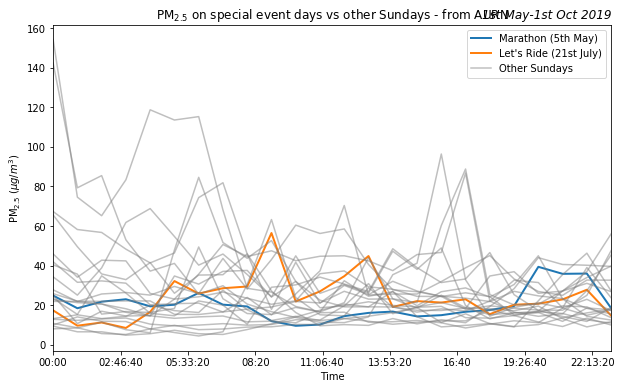

In [25]:
ax = marathon.plot(label='Marathon (5th May)', figsize=(10,6), linewidth=2)
just_ride.plot(ax=ax, label="Let's Ride (21st July)", linewidth=2)
non_marathon_all_lines.plot(ax=ax, color='gray', alpha=0.5, label="_Blah")
plt.legend()
#filled_top = non_marathon_mean + non_marathon_std
#filled_bottom = non_marathon_mean - non_marathon_std
#filled_bottom[filled_bottom < 0] = 0
#plt.fill_between(non_marathon_mean.index, filled_bottom, filled_top, alpha=0.2, color='C1')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on special event days vs other Sundays - from AURN')
plt.title('1st May-1st Oct 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Time')
plt.xticks(TICKS_TWO_HOURLY)
plt.grid()
plt.tight_layout()
#plt.savefig('graphs/SpecialEvent_TimeSeries_MayOnwards_WithAllOtherDays_AURN.png', dpi=300)

/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x112248588> has a label of '_2019-05-19' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x12617dc88> has a label of '_2019-05-26' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x112248240> has a label of '_2019-06-02' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2

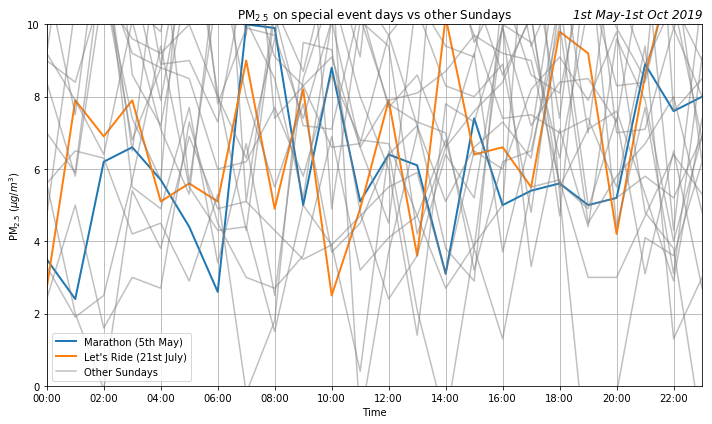

In [39]:
ax = marathon.plot(label='Marathon (5th May)', figsize=(10,6), linewidth=2)
#non_marathon_mean.plot(ax=ax, label='Other Sundays ($\pm$ 1SD)')
just_ride.plot(ax=ax, label="Let's Ride (21st July)", linewidth=2)
non_marathon_all_lines.plot(ax=ax, color='gray', alpha=0.5, label="_Blah")
plt.legend()
#filled_top = non_marathon_mean + non_marathon_std
#filled_bottom = non_marathon_mean - non_marathon_std
#filled_bottom[filled_bottom < 0] = 0
#plt.fill_between(non_marathon_mean.index, filled_bottom, filled_top, alpha=0.2, color='C1')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on special event days vs other Sundays')
plt.title('1st May-1st Oct 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Time')
plt.ylim(0, 10)
plt.xticks(TICKS_TWO_HOURLY)
plt.grid()
plt.tight_layout()
plt.savefig('graphs/SpecialEvent_TimeSeries_MayOnwards_WithAllOtherDays_AURN_Zoomed.png', dpi=300)